In [1]:
import pathlib
import pandas as pd
import geopandas as gp
import shapely.geometry as geom

#### Set file location and read into Pandas

In [2]:
ODpath = pathlib.Path('../data/OD/OD_distance.csv.gz')
with ODpath.open(mode='r') as fid:
    df = pd.read_csv(ODpath, dtype = {'w_geocode': object, 'h_geocode': object})
print(len(df))
df.head()

5385445


,w_geocode,h_geocode,distance,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,w_lat,w_lon,h_lat,h_lon
0,010730027001031,010010202001012,120595.0,1,0,1,0,0,0,1,0,0,1,33.524601,-86.80975,32.473909,-86.477380
1,010730027001031,010010205002022,121269.0,1,1,0,0,1,0,0,0,0,1,33.524601,-86.80975,32.478376,-86.432491
2,010730027001031,010010206001016,122579.0,1,0,0,1,0,0,1,0,0,1,33.524601,-86.80975,32.454652,-86.480848
3,010730027001031,010010206001022,123458.0,1,0,0,1,0,1,0,0,0,1,33.524601,-86.80975,32.447340,-86.476828
4,010730027001031,010010207002007,123950.0,1,0,0,1,0,0,1,0,0,1,33.524601,-86.80975,32.449019,-86.449387


In [3]:
%time df['geometry'] =df.apply(lambda x: geom.LineString([(x['w_lon'], x['w_lat'] ), (x['h_lon'],x['h_lat'])]), axis = 1)

CPU times: user 3min 52s, sys: 6.35 s, total: 3min 59s
Wall time: 4min


In [4]:
%time gdf = gp.GeoDataFrame(df, geometry='geometry')

CPU times: user 867 ms, sys: 9 ms, total: 876 ms
Wall time: 882 ms


In [5]:
gdf.crs = {'init' :'epsg:4326'}

CPU times: user 3min 51s, sys: 27.4 s, total: 4min 19s
Wall time: 4min 30s


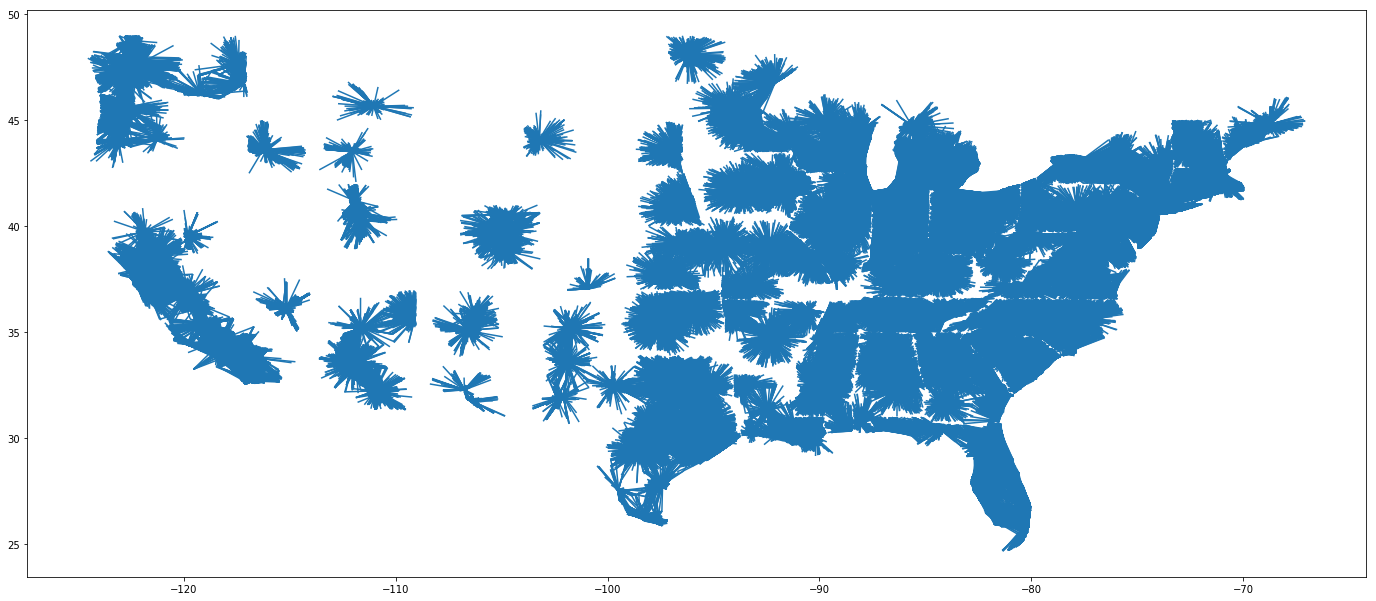

In [15]:
%time ax =gdf.plot(figsize=(24,24));

In [7]:
%time gdf_ky = gdf[gdf['w_geocode'].str.startswith('21')]
len(gdf_ky)

CPU times: user 2.02 s, sys: 726 ms, total: 2.75 s
Wall time: 2.95 s


41156

In [8]:
gdf_ky.crs

{'init': 'epsg:4326'}

CPU times: user 2.22 s, sys: 93.7 ms, total: 2.31 s
Wall time: 2.2 s


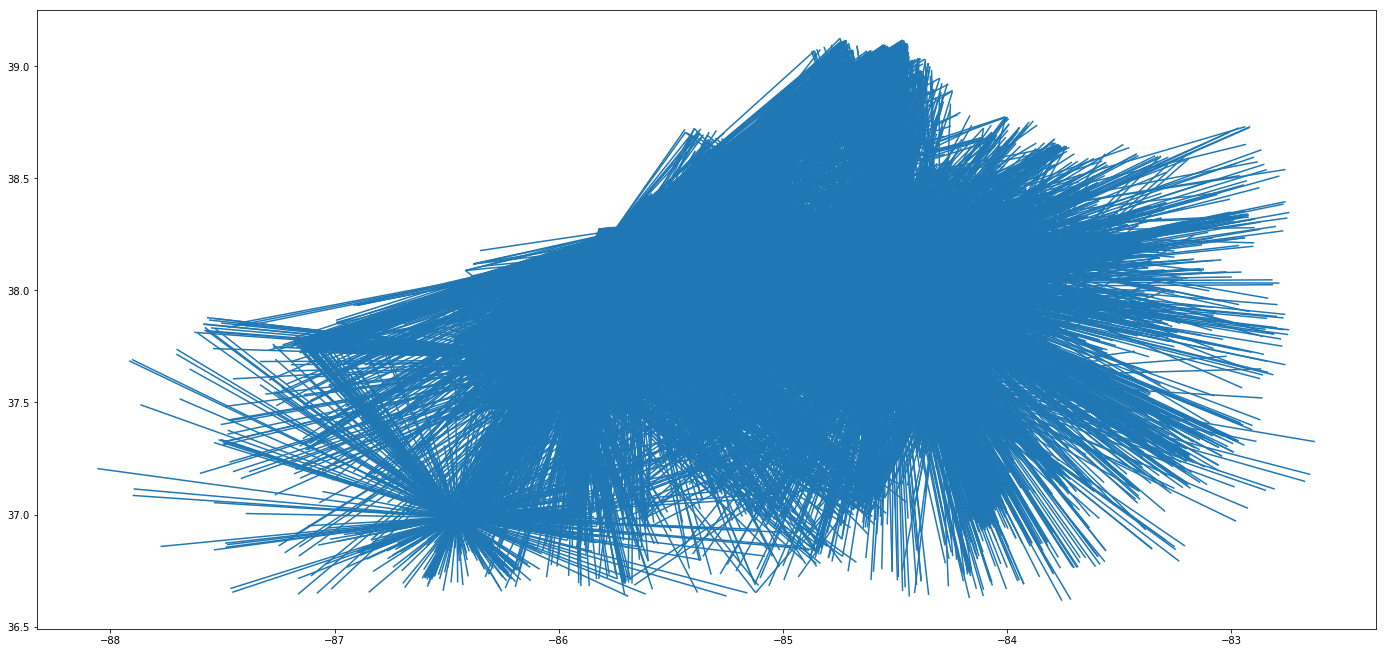

In [9]:
%time ax =gdf_ky.plot(figsize=(24,24));

In [10]:
%time gdf_ky_limited = gdf_ky[(gdf_ky['distance'] < 80000)]


CPU times: user 7.55 ms, sys: 5.27 ms, total: 12.8 ms
Wall time: 10.4 ms


CPU times: user 1.72 s, sys: 47.1 ms, total: 1.76 s
Wall time: 1.65 s


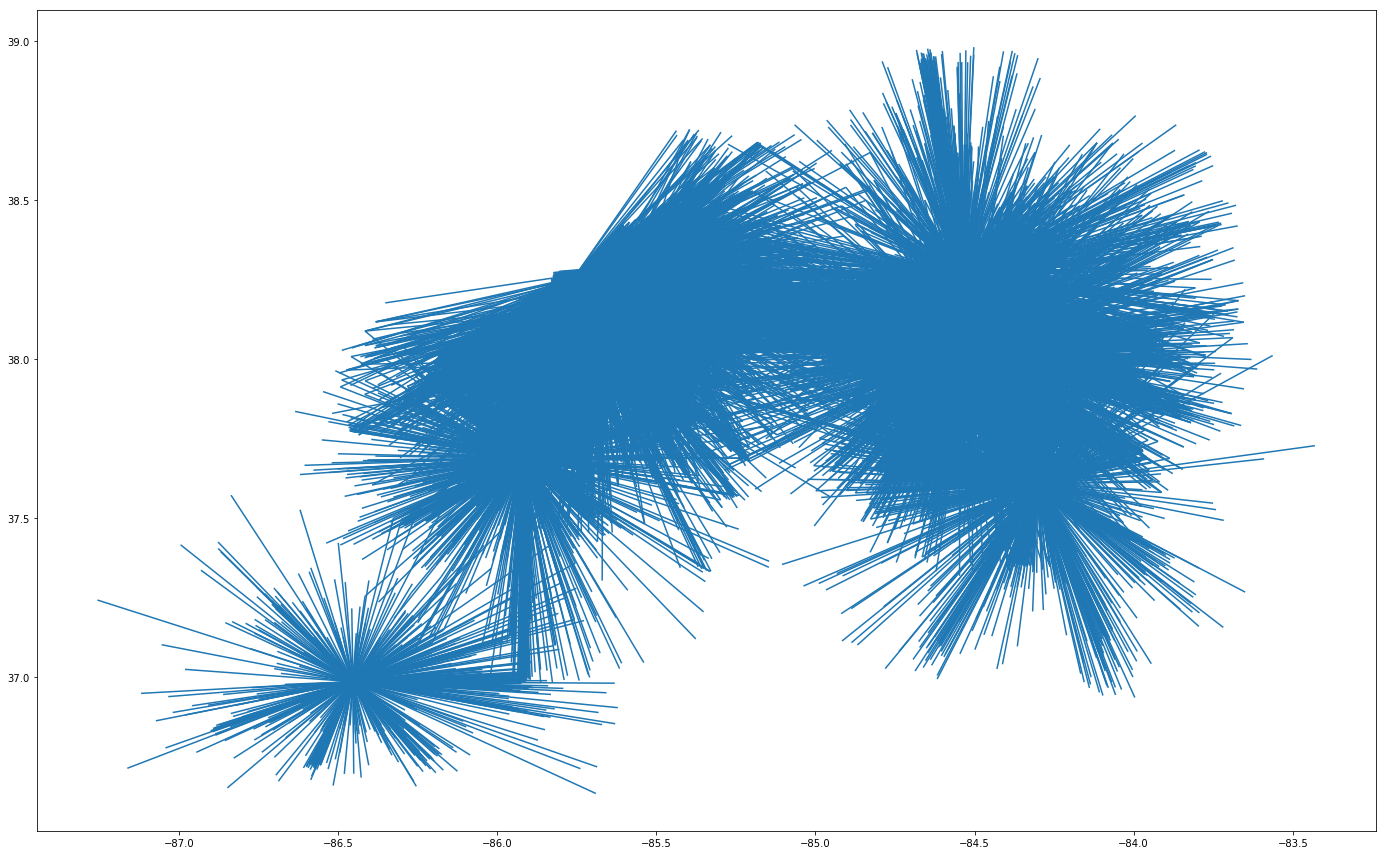

In [11]:
%time ax =gdf_ky_limited.plot(figsize=(24,24));

In [12]:
gdf_ky_limited.crs

{'init': 'epsg:4326'}

In [52]:
import folium

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles='Stamen Toner',
                   zoom_start=10, control_scale=True)
 # Let's change the basemap style to 'Stamen Toner'
m = folium.Map(location=[37.645556, -84.769722], tiles='Stamen Toner',
                zoom_start=12, control_scale=True, prefer_canvas=True)


#m

In [21]:
gdf_ky_limit = gdf_ky_limited.drop(columns=['S000', 'SA01','SA02','SA03','SE01','SE02','SE03','SI01','SI02','SI03','w_lat','w_lon','h_lat','h_lon'])

In [25]:
print(len(gdf_ky_limit))
gdf_ky_limit.head(1)

31612


,w_geocode,h_geocode,distance,geometry
2320840,210290211013002,210059501001004,69609.0,"LINESTRING (-85.66809559999999 37.99491, -84.8..."


In [39]:
gjson = gdf_ky_limit.geometry.to_json()

In [50]:
type(gjson)

str

In [51]:
gdf_ky_limit.to_file("output.json", driver="GeoJSON")

In [41]:
#folium.GeoJson(gdf_ky_limited).add_to(m)
lines = folium.features.GeoJson(gjson)

In [47]:

m

In [ ]:
map.add_child(folium.GeoJson(data=open('world_geojson_from_ogr.json'),
name="Population",
style_function=lambda x: {'fillColor':'green' if x['properties']['POP2005'] <= 10000000 else 'orange' if 10000000 < x['properties']['POP2005'] < 20000000 else 'red'}))

#### Convert distance from float with decimal to no decimal string

In [3]:
df['distance'] = df['distance'].apply(lambda x: str(int(x)))
df.head()

,w_geocode,h_geocode,distance,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,w_lat,w_lon,h_lat,h_lon
0,10730027001031,10010202001012,120595,1,0,1,0,0,0,1,0,0,1,33.524601,-86.80975,32.473909,-86.477380
1,10730027001031,10010205002022,121269,1,1,0,0,1,0,0,0,0,1,33.524601,-86.80975,32.478376,-86.432491
2,10730027001031,10010206001016,122579,1,0,0,1,0,0,1,0,0,1,33.524601,-86.80975,32.454652,-86.480848
3,10730027001031,10010206001022,123458,1,0,0,1,0,1,0,0,0,1,33.524601,-86.80975,32.447340,-86.476828
4,10730027001031,10010207002007,123950,1,0,0,1,0,0,1,0,0,1,33.524601,-86.80975,32.449019,-86.449387
